In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

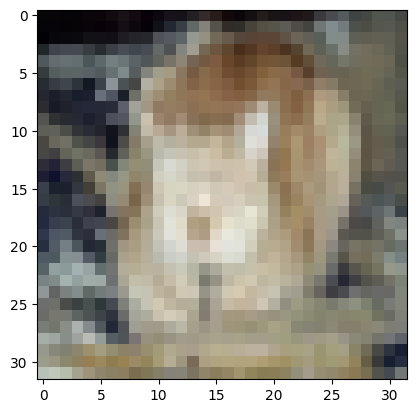

In [7]:
plt.imshow(x_train[33])

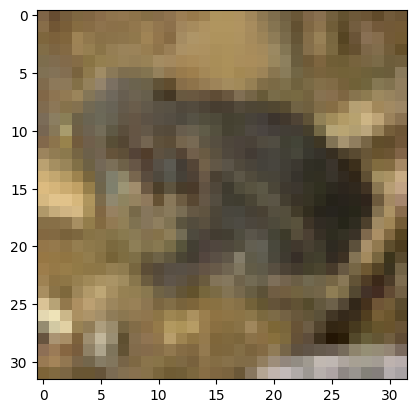

In [8]:
plt.imshow(x_train[23])

In [9]:
x_train[0].max()

np.uint8(255)

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_test[0]

array([3], dtype=uint8)

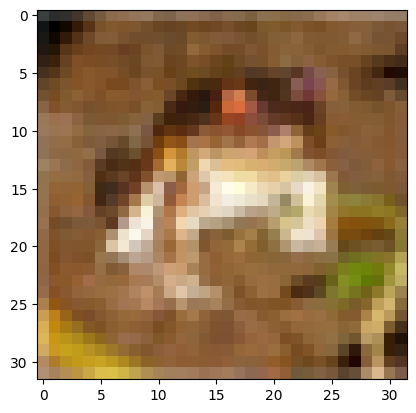

In [19]:
plt.imshow(x_train[0])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten



In [21]:
model = Sequential()

In [22]:
#convulational layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape = (32,32,3),activation='relu'))


/Users/shilpabhandari/Desktop/CIFAR-Analysis/.cifar/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.add(MaxPool2D(pool_size=(2,2)))

In [24]:
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


/Users/shilpabhandari/Desktop/CIFAR-Analysis/.cifar/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.add(Flatten())

In [ ]:
#adds nonlinearity to the problem by introducing a new formula
model.add(Dense(256,activation='relu'))

In [33]:
#convert outputs to probabilities after creation of 10 neurons
model.add(Dense(10,activation='softmax'))

In [34]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3801 - loss: 1.6951 - val_accuracy: 0.5390 - val_loss: 1.3128
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5728 - loss: 1.2073 - val_accuracy: 0.5851 - val_loss: 1.1797
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6349 - loss: 1.0388 - val_accuracy: 0.6303 - val_loss: 1.0553
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6786 - loss: 0.9197 - val_accuracy: 0.6559 - val_loss: 0.9904
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7123 - loss: 0.8269 - val_accuracy: 0.6405 - val_loss: 1.0581
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7420 - loss: 0.7365 - val_accuracy: 0.6750 - val_loss: 0.9395
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7695 - loss: 0.6687 - val_accuracy: 0.6698 - val_loss: 0.9817
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7960 - 

In [38]:
metrics = pd.DataFrame(model.history.history)

In [39]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.45964,1.501166,0.5390,1.312804
1,0.58448,1.176579,0.5851,1.179725
2,0.63948,1.028633,0.6303,1.055289
3,0.67984,0.921945,0.6559,0.990438
4,0.71158,0.830905,0.6405,1.058140
5,0.73884,0.749550,0.6750,0.939535
6,0.76264,0.682257,0.6698,0.981715
7,0.78586,0.612657,0.6759,1.005544


In [40]:
metrics.columns


Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

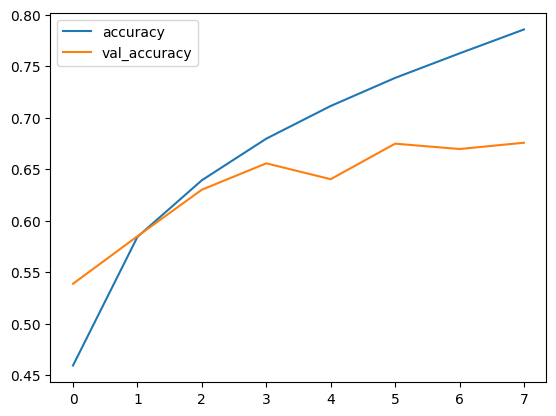

In [41]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

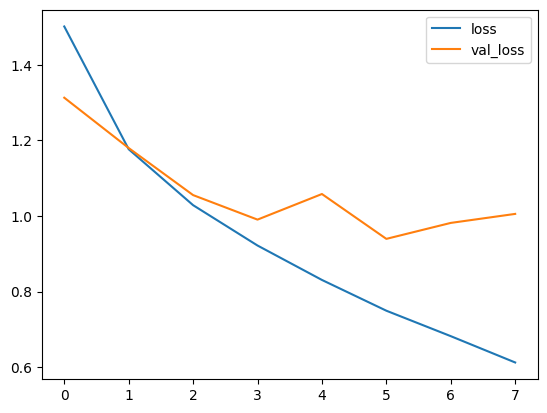

In [42]:
metrics[['loss','val_loss']].plot()


In [ ]:
#high test loss indicating poor performance
model.evaluate(x_test,y_cat_test,verbose = 0)


[1.0055439472198486, 0.6758999824523926]

In [46]:
from sklearn.metrics import classification_report,confusion_matrix


In [49]:
predictions = model.predict(x_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [51]:
predictions = predictions.argmax(axis=-1)


In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1000
           1       0.87      0.69      0.77      1000
           2       0.58      0.56      0.57      1000
           3       0.47      0.52      0.49      1000
           4       0.69      0.58      0.63      1000
           5       0.56      0.58      0.57      1000
           6       0.76      0.75      0.76      1000
           7       0.71      0.73      0.72      1000
           8       0.77      0.82      0.79      1000
           9       0.72      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [56]:
import seaborn as sns



<Axes: >

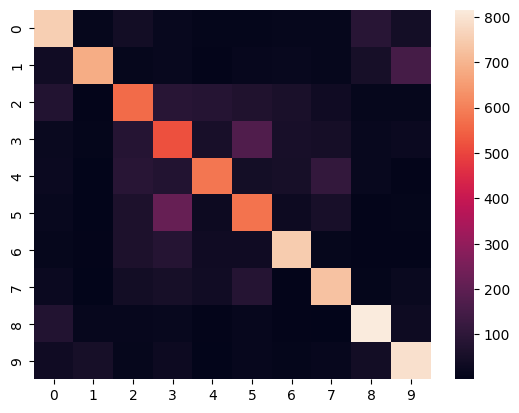

In [57]:
plt.Figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions))


In [58]:
my_image = x_test[0]


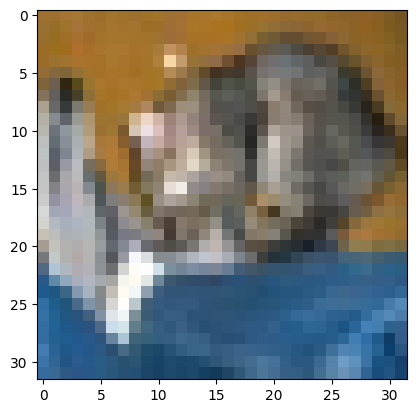

In [59]:
plt.imshow(my_image)


In [60]:
y_test[0]


array([3], dtype=uint8)

In [63]:
my_image_pred = model.predict(my_image.reshape(1,32,32,3))
predictions = my_image_pred.argmax(axis=-1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [64]:
predictions


array([3])